In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import glob as gb
import os

%matplotlib inline

In [2]:
# Load HDF file
df = pd.HDFStore('store1.h5')['df']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 4199
Data columns (total 15 columns):
datetime         4200 non-null datetime64[ns]
chip             4200 non-null object
concentration    4200 non-null float64
fs               4200 non-null float64
humidity         4200 non-null float64
medium           4200 non-null object
sample_no        4200 non-null int64
sweep_no         4200 non-null int64
sweeps           4200 non-null int64
tempC            4200 non-null float64
timeID           4200 non-null float64
folder           4200 non-null object
a                4200 non-null float64
tau              4200 non-null float64
c                4200 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(3), object(3)
memory usage: 525.0+ KB


In [3]:
df.columns

Index(['datetime', 'chip', 'concentration', 'fs', 'humidity', 'medium',
       'sample_no', 'sweep_no', 'sweeps', 'tempC', 'timeID', 'folder', 'a',
       'tau', 'c'],
      dtype='object')

In [4]:
df.head()

,datetime,chip,concentration,fs,humidity,medium,sample_no,sweep_no,sweeps,tempC,timeID,folder,a,tau,c
0,2016-06-23 16:36:46.948277,T12,0.0,0.0001,41.02,Intralipid_concentration,1000,0,600,26.36,1.466696e+09,1466696206.82827,0.233894,9.445533,0.003037
1,2016-06-23 16:36:47.280296,T12,0.0,0.0001,41.02,Intralipid_concentration,1000,1,600,26.36,1.466696e+09,1466696206.82827,0.234519,9.445358,0.003049
2,2016-06-23 16:36:47.499308,T12,0.0,0.0001,40.98,Intralipid_concentration,1000,2,600,26.37,1.466696e+09,1466696206.82827,0.234968,9.434953,0.003066
3,2016-06-23 16:36:47.645317,T12,0.0,0.0001,40.98,Intralipid_concentration,1000,3,600,26.37,1.466696e+09,1466696206.82827,0.234263,9.439931,0.003066
4,2016-06-23 16:36:47.796325,T12,0.0,0.0001,40.98,Intralipid_concentration,1000,4,600,26.37,1.466696e+09,1466696206.82827,0.235666,9.437832,0.003120


In [5]:
df = df[['folder', 'chip', 'concentration', 'medium', 'a', 'tau']]

In [6]:
grouped = df.groupby(['chip', 'medium', 'concentration'])
grouped = df.groupby(['chip', 'concentration'])
mean = grouped.mean()
std = grouped.std()
mean.head(10)

a       tau
chip concentration                    
T12  0.0            0.234510  9.452306
     0.5            0.265843  9.445100
     1.0            0.288923  9.437490
     2.0            0.317314  9.424925
     3.0            0.336249  9.415326
     4.0            0.351447  9.407387
     5.0            0.364637  9.401316

In [7]:
mean = mean.reset_index()
mean = mean.set_index('chip')
mean.head(10)

,concentration,a,tau
chip,,,
T12,0.0,0.234510,9.452306
T12,0.5,0.265843,9.445100
T12,1.0,0.288923,9.437490
T12,2.0,0.317314,9.424925
T12,3.0,0.336249,9.415326
T12,4.0,0.351447,9.407387
T12,5.0,0.364637,9.401316


In [8]:
mean.index.get_level_values(0).unique()

array(['T12'], dtype=object)

T16


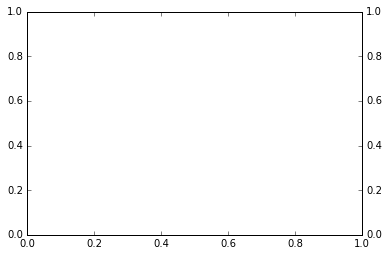

In [18]:
for sample in mean.index.get_level_values(0).unique():
    data = mean.loc[sample]
    stdd = std.loc[sample]
    
    try:
        
        fig, ax1 = plt.subplots()

        ax2 = ax1.twinx()
        ax1.errorbar(data['concentration'], data['tau'], yerr=stdd['tau'], color='b', lw='2')
        ax2.errorbar(data['concentration'], data['a'], yerr=stdd['a'], color='g', lw='2')

        ax1.set_xlabel('Glucose concentration (mmol)')
        ax1.set_ylabel('Lifetime (ms)', color='b')
        ax2.set_ylabel('Amplitude (A.U.)', color='g')

        ax1.grid()
        plt.tight_layout()
        ax1.ticklabel_format(useOffset=False, axis='y')
        ax2.ticklabel_format(useOffset=False, axis='y')

        plt.title(sample)
#         plt.savefig("Data/Plots/together/" + sample + '.png', dpi=500)
        plt.close()
    except:
        print(sample)

In [21]:
mean.loc[sample]['tau']

chip
T16    10.839190
T16    10.829842
T16    10.954803
T16    11.475523
T16    12.005765
T16    12.556237
Name: tau, dtype: float64

In [9]:
for sample in mean.index.get_level_values(0).unique():
    data = mean.loc[sample]
    stdd = std.loc[sample]
    
    try:
        
        fig, ax1 = plt.subplots()

        ax2 = ax1.twinx()
        ax1.plot(data['concentration'], data['tau'], 'b.-', lw='2', markersize=20)
        ax2.plot(data['concentration'], data['a'], 'g.-', lw='2', markersize=20)

        ax1.set_xlabel('Glucose concentration (mmol)')
        ax1.set_xlabel('Intralipid concentration (%)')
        ax1.set_ylabel('Lifetime (ms)', color='b')
        ax2.set_ylabel('Amplitude (A.U.)', color='g')

        ax1.grid()
        plt.tight_layout()
        ax1.ticklabel_format(useOffset=False, axis='y')
        ax2.ticklabel_format(useOffset=False, axis='y')

        plt.title(sample)
        plt.savefig("Plots/together/" + sample + '_T12_intralipidConc.png', dpi=500)
        plt.close()
    except:
        print(sample)